#Logistic Regression

Logistic Regression is a type of **classification** algorithm which classifies or categorises a given set of data into different class labels.
Logistic Regression is used to predict the probability of an outcome for an event. It calculates a threshold probability value. If the probability of an outcome is less than the threshold probability, then logistic regression classifies that outcome as `0`, otherwise as `1`.

In linear regression, the output is a direct linear combination of input features. It can take any value between negative and positive infinity. This can be problematic for classification problems where we need probabilities constrained between 0 and 1.

Logistic regression addresses this by applying the sigmoid (logistic) function to the output of a linear model. The sigmoid function maps any real-valued number into the range (0, 1), making it suitable for classification tasks.

csv_file="https://drive.google.com/uc?id=1L9vTYYq6zm0QjCAG7RpST-SE7eSD-VTt"

You have already worked on the **heart disease dataset** where you calculated the probability of a person having heart disease by examining the `chol` (cholesterol) values. The results roughly suggested that people with less cholesterol level have greater chances of heart disease and people with high cholesterol level have lesser chances of heart disease.

**Data Description**

The Heart Disease UCI dataset contains data collected on 14 different attributes by examining 303 patients. The dataset focuses only on differentiating patients having heart disease; labelled as value 1 and those not having heart disease; labelled as value 0. The 14 attributes (or columns) are as follows:

|Columns|Description|
|-|-|
|age|age in years|
|sex|sex (1 = male; 0 = female)|
|cp|chest pain type (4 values)|
|trestbps|resting blood pressure (in mm Hg on admission to the hospital)|
|chol|serum cholesterol in $\frac{mg}{dl}$|
|fbs|fasting blood sugar > 120 $\frac{mg}{dl}$|
|restecg|resting electrocardiographic results (values 0, 1, 2)|
|thalach|maximum heart rate achieved|
|exang|exercise induced angina (1 = yes; 0 = no)|
|oldpeak|ST depression induced by exercise relative to rest|
|slope|the slope of the peak exercise ST segment|
|ca|number of major vessels (0-3) colored by fluoroscopy|
|thal|A blood disorder called thalassemia|
|target|1 = presence of heart disease; 0 = absence of heart disease|

**Source:** https://archive.ics.uci.edu/ml/datasets/Heart+Disease




In [ ]:
import pandas as pd
df = pd.read_csv("https://drive.google.com/uc?id=1L9vTYYq6zm0QjCAG7RpST-SE7eSD-VTt")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


The target variable `target` has two values: `0` and `1`. This means that our dataset is composed of two classes or labels:

 - Class `0` - Patients NOT having heart disease
 - Class `1` - Patients having heart disease

Such problems are known as **binary classification** problem where the target attribute can have only two possible values (for e.g. `0` and `1`).

Before we start building the model, let us find out whether our dataset is balanced or not i.e. whether class distribution is uniform among all the classes. An imbalanced dataset means that the number of observations belonging to one class is significantly lower than that of the other class. Such datasets will result in a biased classifier which will hamper the results.

In [ ]:
# Check for data imbalance
df['target'].value_counts(normalize=True)*100

,proportion
target,
1,54.455446
0,45.544554


Data is balanced.

In [ ]:
from sklearn.model_selection import train_test_split
X = df['chol']
y = df['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
X_train_reshaped= X_train.values.reshape(-1,1)
model = LogisticRegression(n_jobs=-1)
model.fit(X_train_reshaped,y_train)
print(f"Accuracy score of the model is {model.score(X_train_reshaped,y_train)}")

Accuracy score of the model is 0.5283018867924528


In [ ]:
#Evaluation
from sklearn.metrics import confusion_matrix, classification_report
X_test_reshaped= X_test.values.reshape(-1,1)
y_test_predict= model.predict(X_test_reshaped)

print(confusion_matrix(y_test,y_test_predict))


[[ 2 39]
 [ 0 50]]


## Confusion Matrix

Postive class =1

Negative class=0

||Predicted Class `0` (`y_predicted`)|Predicted Class `1` (`y_predicted`)|
|-|-|-|
|Actual Class `0` (`y_test`)|2 (TN)|39 (FP)|
|Actual Class `1` (`y_test`)|0 (FN)|50 (TP)|

For a better model, the True values should be more.

## Precision And Recall, f1-score

A good prediction model provides a very large number of true positive (TP) values and a very low number of true negative values.

Now, based on the TP and FP values, we define a parameter called **precision**. It is the ratio of the TP values to the sum of TP and FP values, i.e.,

$$\text{precision} = \frac{\text{TP}}{\text{TP + FP}}$$

Precision is Out of all the positive predictions made by the model, how many are actually correct?

High precision means that when the model predicts a positive class, it is mostly correct.
It is useful when false positives are costly, such as in spam detection, where misclassifying a legitimate email as spam is undesirable.


Based on the TP and FN values, we define another parameter called **recall or Senstivity**. It is the ratio of the TP values to the sum of TP and FN values, i.e,

$$\text{recall} = \frac{\text{TP}}{\text{TP + FN}}$$

Recall is Out of all the actual positive instances, how many did the model correctly identify?

High recall means the model is good at capturing most of the actual positives.
It is important in situations where false negatives are costly, such as in disease diagnosis, where failing to identify a positive case could be dangerous.

There is a trade-off. If the recall value is high, then the precision value will be low and vice-versa. Hence, we need to find an optimum point where both, the precision and the recall values are acceptable.


To find an optimum point where both, the precision and recall values, are high, we calculate another parameter called **f1-score**. It is a harmonic mean of the precision and recall values, i.e.,

$$\text{f1-score} = 2 \left( \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}} \right)$$


 It balances precision and recall, especially when there is an uneven class distribution.

 The F1-score is high when both precision and recall are high.
It is useful when you want to balance between precision and recall, such as in situations where both false positives and false negatives have significant consequences (e.g., in information retrieval).

In [ ]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       1.00      0.05      0.09        41
           1       0.56      1.00      0.72        50

    accuracy                           0.57        91
   macro avg       0.78      0.52      0.41        91
weighted avg       0.76      0.57      0.44        91



##Sigmoid Function

The sigmoid function, in maths, classifies any data point between **0** and **1**. The graph of a sigmoid function follows the shape of English letter **S**. Mathematically, the sigmoid function is given as

$$y =  \frac{1}{1 + e^{-x}}$$

where,  

- $y$ is the output of the sigmoid function

- $x$ is an independent variable

- $e$ is Euler's constant

The $x$ takes all the values between $- \infty$ to $\infty$ i.e., $x \in (-\infty, \infty)$ and the $y$ ranges between $0$ to $1$ i.e., $y \in (0, 1)$.

**Q: What is so great about sigmoid function in machine learning?**

The sigmoid function in the context of machine learning returns the probability of occurrence of an event. As you know, the probability of an event ranges between 0 and 1. So does the output of the sigmoid function. Hence, usage of sigmoid function to calculate probabilities to classify outcomes (say 0 and 1) seems like a natural fit.



In [ ]:
import numpy as np
def sigmoid(x):
  y = 1/(1+np.exp(-x))
  return y

[9.99876605e-01 1.79862100e-02 9.99088949e-01 1.19202922e-01
 9.99664650e-01 3.35350130e-04 7.31058579e-01 4.74258732e-02
 3.35350130e-04 8.80797078e-01 2.68941421e-01 2.47262316e-03
 9.99876605e-01 1.19202922e-01 1.79862100e-02 4.53978687e-05
 9.11051194e-04 5.00000000e-01 6.69285092e-03 1.79862100e-02
 9.99664650e-01 4.74258732e-02 4.74258732e-02 1.23394576e-04
 6.69285092e-03 1.23394576e-04 9.93307149e-01 9.82013790e-01
 9.82013790e-01 3.35350130e-04 9.82013790e-01 9.52574127e-01
 9.11051194e-04 9.82013790e-01 4.53978687e-05 2.47262316e-03
 4.53978687e-05 3.35350130e-04 7.31058579e-01 4.74258732e-02
 5.00000000e-01 9.11051194e-04 2.47262316e-03 3.35350130e-04
 6.69285092e-03 4.74258732e-02 4.74258732e-02 9.52574127e-01
 2.47262316e-03 9.11051194e-04 3.35350130e-04 8.80797078e-01
 9.82013790e-01 6.69285092e-03 2.47262316e-03 9.11051194e-04
 2.68941421e-01 9.99876605e-01 2.68941421e-01 9.99664650e-01
 9.82013790e-01 1.23394576e-04 4.74258732e-02 9.99088949e-01
 9.82013790e-01 7.310585

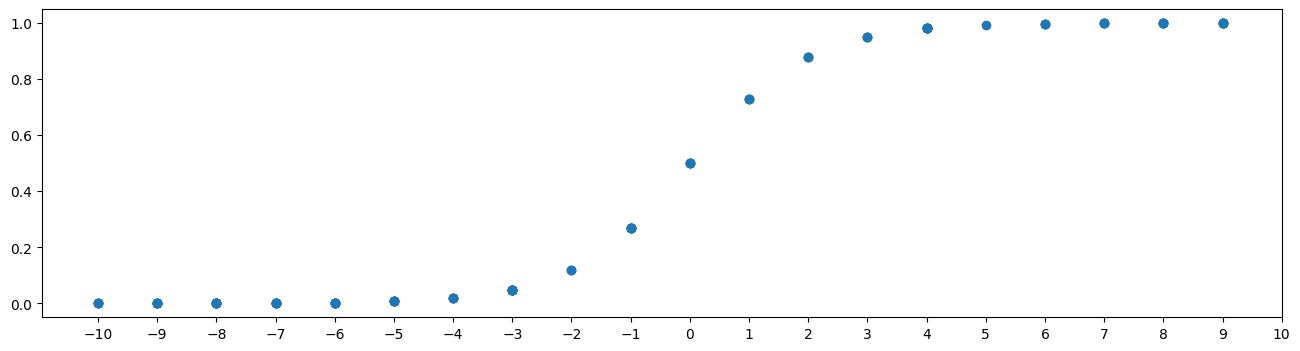

In [ ]:
# Create a numpy array having 100 random integers between -10 and 10. Pass the array as an input to the 'sigmoid()' function.
rand_array = np.random.randint(-10,10,100)
sigmoid_result = sigmoid(rand_array)
print(sigmoid_result)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (16,4))
plt.scatter(rand_array,sigmoid_result)
plt.xticks(range(-10,11))
plt.show()

To classify an outcome as either yes or no (1 or 0), you need to randomly assign a probability value as the threshold value. Let's say the threshold probability value is  0.5 . If for any input value, the corresponding sigmoid function output is less than 0.5, then you can label that outcome as 0 or no
else, you can label that outcome as 1 or yes.

In [ ]:
def predict(sig_result,threshold_prob):
  result = []
  for x in sig_result:
    if x >= threshold_prob:
      result.append(1)
    else:
      result.append(0)

  result = pd.Series(result)
  return result

pred=predict(sigmoid_result,0.5)
print(pred)

0     1
1     0
2     1
3     0
4     1
     ..
95    1
96    1
97    0
98    0
99    0
Length: 100, dtype: int64


In [ ]:
df["chol"].describe()

,chol
count,303.000000
mean,246.264026
std,51.830751
min,126.000000
25%,211.000000
50%,240.000000
75%,274.500000
max,564.000000


In [ ]:
def zscore(x):
  return (x-x.mean())/x.std()
norm_chol = zscore(df["chol"])
norm_chol.describe()

,chol
count,3.030000e+02
mean,-1.113887e-16
std,1.000000e+00
min,-2.320322e+00
25%,-6.803688e-01
50%,-1.208554e-01
75%,5.447726e-01
max,6.130260e+00


In [ ]:
sig_chol= sigmoid(norm_chol)
pred_chol=predict(sig_chol,0.5)

In [ ]:
print(confusion_matrix(df['target'],pred_chol))
print()
print(classification_report(df['target'],pred_chol))

[[ 65  73]
 [102  63]]

              precision    recall  f1-score   support

           0       0.39      0.47      0.43       138
           1       0.46      0.38      0.42       165

    accuracy                           0.42       303
   macro avg       0.43      0.43      0.42       303
weighted avg       0.43      0.42      0.42       303



The results are not satisfactory. So we can use multivariate logistic regression.


In [ ]:
X= df.drop(columns='target')
y= df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Aplly standardization
def z_score(x):
  return (x-x.mean())/x.std()

X_train_norm = X_train.apply(z_score,axis=0)
X_test_norm = X_test.apply(z_score,axis=0)

#Build model
lr= LogisticRegression()
lr.fit(X_train_norm,y_train)
print(f"accuracy score of the model is {lr.score(X_train_norm,y_train)}")
print(lr.intercept_)
print(lr.coef_)

accuracy score of the model is 0.8726415094339622
[0.12932486]
[[ 0.02686756 -0.65606577  0.84071359 -0.14317619 -0.13013594  0.19678171
   0.38070115  0.36560853 -0.59257796 -0.50744839  0.57207027 -1.03789044
  -0.73804446]]


In [ ]:
pred_y_train=lr.predict(X_train_norm)
pred_y_test=lr.predict(X_test_norm)
print('Train Performance')
print(confusion_matrix(y_train,pred_y_train))
print()
print(classification_report(y_train,pred_y_train))

print('Test Performance')
print(confusion_matrix(y_test,pred_y_test))
print()
print(classification_report(y_test,pred_y_test))

Train Performance
[[ 80  17]
 [ 10 105]]

              precision    recall  f1-score   support

           0       0.89      0.82      0.86        97
           1       0.86      0.91      0.89       115

    accuracy                           0.87       212
   macro avg       0.87      0.87      0.87       212
weighted avg       0.87      0.87      0.87       212

Test Performance
[[32  9]
 [ 6 44]]

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        41
           1       0.83      0.88      0.85        50

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



Let us apply RFE and select 3 features.

In [ ]:
from sklearn.feature_selection import RFE
lr1 = LogisticRegression()
rfe = RFE(estimator=lr1,n_features_to_select=3)
rfe.fit(X_train_norm,y_train)
rfe_features = X_train_norm.columns[rfe.support_]
rfe_X_train = X_train_norm[rfe_features]

lg = LogisticRegression()
lg.fit(rfe_X_train,y_train)
rfe_X_test = X_test_norm[rfe_features]
print(rfe_features)

Index(['cp', 'oldpeak', 'ca'], dtype='object')


In [ ]:
y_pred_rfe= lg.predict(rfe_X_test)
print(confusion_matrix(y_test,y_pred_rfe))
print(classification_report(y_test,y_pred_rfe))


[[32  9]
 [ 7 43]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        41
           1       0.83      0.86      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



In [ ]:
y_pred_rfe

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1])

In [ ]:
lg.predict_proba(rfe_X_test)

array([[0.5970008 , 0.4029992 ],
       [0.02582982, 0.97417018],
       [0.13719169, 0.86280831],
       [0.90442364, 0.09557636],
       [0.1196215 , 0.8803785 ],
       [0.17208495, 0.82791505],
       [0.28675762, 0.71324238],
       [0.98012143, 0.01987857],
       [0.96335732, 0.03664268],
       [0.1675621 , 0.8324379 ],
       [0.35508251, 0.64491749],
       [0.38085085, 0.61914915],
       [0.15281761, 0.84718239],
       [0.65945691, 0.34054309],
       [0.13355598, 0.86644402],
       [0.05579972, 0.94420028],
       [0.21087551, 0.78912449],
       [0.73532452, 0.26467548],
       [0.89740973, 0.10259027],
       [0.93997388, 0.06002612],
       [0.03503837, 0.96496163],
       [0.58575965, 0.41424035],
       [0.46875215, 0.53124785],
       [0.52738143, 0.47261857],
       [0.14676398, 0.85323602],
       [0.28675762, 0.71324238],
       [0.02215556, 0.97784444],
       [0.28675762, 0.71324238],
       [0.9147058 , 0.0852942 ],
       [0.28675762, 0.71324238],
       [0.

In [ ]:
print(lg.intercept_)
print(lg.coef_)

[0.09149521]
[[ 0.97528819 -1.03223192 -0.95976019]]


In [ ]:
b0= lg.intercept_[0]
b1,b2,b3= lg.coef_[0]
print(b0,b1,b2,b3)

0.09149521140551103 0.9752881922356897 -1.0322319160981948 -0.9597601916643484


## Decision Boundary

Let's rewrite the sigmoid function as
$$p =  \frac{1}{1 + e^{-h}}$$

where
- $p$ is the probability value between 0 and 1
- $h$ is some relationship between $x_1, x_2, x_3, \dots, x_n$
- $x_1, x_2, x_3, \dots, x_n$ are $n \in N$ feature(s) in a dataset

In this case of dataset with 2 features, $h = \beta_0 + \beta_1 x_1 + \beta_2 x_2$

You can also read $h$ as a **hypothesis**. In a broader sense, to predict the labels 0 and 1 through logistic regression, you need to pass a hypothesis as an input to the sigmoid function. In this case, the hypothesis is that the `col 1` and `col 2` values have a linear relationship ($h = \beta_0 + \beta_1 x_1 + \beta_2 x_2$) that predicts the labels 0 and 1.

$$\therefore p =\frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2)}}$$

where $\beta_0, \beta_1, \beta_2$ are coefficients and $x_1, x_2$ are the independent variables.

The above expression can also be written as

$$p =\frac{1}{1 + e^{-BX^T}}$$

where

- $X$ denotes the feature matrix i.e.

  $$X = \begin{bmatrix} 1 & x_{1,1} & x_{2,1} \\ 1 & x_{1,2} & x_{2,2}\\ 1 & x_{1,3} & x_{2,3} \\ \vdots & \vdots & \vdots \\ 1 & x_{1,1000} & x_{2,1000} \end{bmatrix}$$

  Each item in the above matrix can be represented by $x_{i,j}$ where $x_{i,j}$ denotes the $j^{\text{th}}$ item in the $i^{\text{th}}$ column. Also the values of $i$ goes from $1$ to $2$ and the values of $j$ goes from $1$ to $1000$.

- $B$ denotes the regression coefficients matrix i.e.

  $$B = \begin{bmatrix} \beta_0 & \beta_1 & \beta_2\end{bmatrix}$$

Essentially, $$h = BX^T$$


The above product after taking the transpose of the features matrix becomes

$$h = \begin{bmatrix} \beta_0 & \beta_1 & \beta_2\end{bmatrix} \begin{bmatrix} 1 & 1 & 1 & \dots & 1 \\ x_{1,1} & x_{1,2} & x_{1,3} & \dots & x_{1,1000} \\ x_{2,1} & x_{2,2} & x_{2,3} & \dots & x_{2,1000} \end{bmatrix}$$

So let's create the `sigmoid()` function in Python that takes the arrays containing the features and the regression coefficients as inputs and returns the probability values as output. But first, you need to add a column containing 1s to the features array.

In [ ]:
new_x_train_norm = np.append(np.ones((len(rfe_X_train),1)),rfe_X_train.values , axis = 1)
print(new_x_train_norm)

[[ 1.          0.95055957 -0.92899096 -0.67469366]
 [ 1.         -0.0136444  -0.92899096 -0.67469366]
 [ 1.          0.95055957  0.53665431 -0.67469366]
 [ 1.         -0.97784836  0.170243   -0.67469366]
 [ 1.          0.95055957 -0.92899096  3.53221977]
 [ 1.         -0.97784836 -0.37937398 -0.67469366]
 [ 1.         -0.97784836 -0.83738813  2.48049141]
 [ 1.         -0.0136444  -0.92899096 -0.67469366]
 [ 1.          0.95055957  0.71985997 -0.67469366]
 [ 1.          0.95055957  0.53665431 -0.67469366]
 [ 1.          0.95055957 -0.92899096 -0.67469366]
 [ 1.         -0.97784836 -0.83738813 -0.67469366]
 [ 1.         -0.97784836  3.10153355  2.48049141]
 [ 1.         -0.97784836 -0.83738813  0.37703469]
 [ 1.         -0.0136444  -0.37937398 -0.67469366]
 [ 1.         -0.0136444   0.07864017 -0.67469366]
 [ 1.         -0.97784836 -0.92899096 -0.67469366]
 [ 1.         -0.97784836 -0.56257964 -0.67469366]
 [ 1.         -0.97784836  1.36107978 -0.67469366]
 [ 1.          0.95055957 -0.92

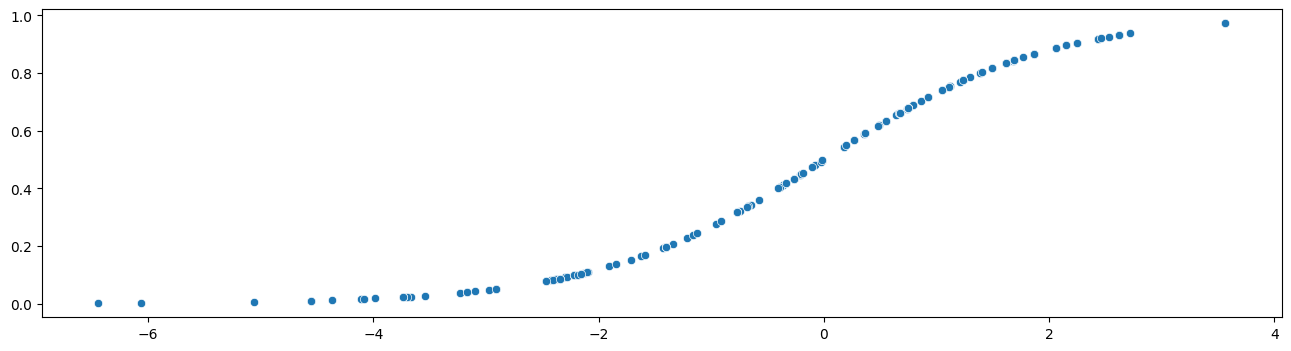

In [ ]:
b = [b0,b1,b2,b3]
h = np.matmul(b,np.transpose(new_x_train_norm))
def sigmoid(x,y):
  return 1/ (1+np.exp(-1*np.matmul(y,np.transpose(x))))

sigmoid_output = sigmoid(new_x_train_norm,b)


plt.figure(figsize = (16,4))
sns.scatterplot(x = h,y = sigmoid_output)
plt.show()

In [ ]:
prediction = pd.Series([1 if i >= 0.5 else 0 for i in sigmoid_output])
print(confusion_matrix(y_train,prediction))
print()
print(classification_report(y_train,prediction))


[[75 22]
 [18 97]]

              precision    recall  f1-score   support

           0       0.81      0.77      0.79        97
           1       0.82      0.84      0.83       115

    accuracy                           0.81       212
   macro avg       0.81      0.81      0.81       212
weighted avg       0.81      0.81      0.81       212



## Regularised Cost Function

After building a logistic regression model using the `sklearn` module of Python, we obtained the following values of the coefficients:

- $\beta_0 = 0.09149118481852542$
- $\beta_1 = 0.9752827972167385$
- $\beta_2 = -1.0322324137338827$
- $\beta_3 = -0.9597551801939529$

Now we need to obtain the same without using any Python module. For this, you will have to use the following expression (called the **regularised cost function**)

$$J(\beta) = -\frac{1}{m} \left[ \sum_{i = 1}^m \{ y_i \log(p_i) + (1 - y_i)\log(1 - p_i) \} \right]+ \frac{\lambda}{2m}\sum_{j = 1}^n \beta_j ^2$$

where

- $p_i = \frac{1}{1 + e^{-h_i}}$

- $h_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_n x_{in}$

  In this case, $n = 2$

  $\therefore h_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2}$

- $i$ is the row number in a data-frame

- $m$ is the total number of rows in a data-frame

- $n$ is the total number of independent variables in a data-frame

- $\lambda$ is the regularisation rate

- $y$ is the actual label (or class) i.e. either $y = 0$ or $ y = 1$


###Steps to Build Regularised Cost Function

Now let's learn how we obtained the above cost regularised cost function and how it provides the values of the coefficients.

Here are the steps to be followed to estimate the coefficients.

1. Consider a matrix of coefficients
   
   $$\beta = \begin{bmatrix}\beta_0 & \beta_1 & \beta_2 & \dots & \beta_n\end{bmatrix}$$

   and another matrix of features
   
   $$X = \begin{bmatrix}1 & x_{11} & x_{12} & x_{13} & \dots & x_{1n} \\ 1 & x_{21} & x_{22} & x_{23} & \dots & x_{2n} \\ 1 & x_{31} & x_{32} & x_{33} & \dots & x_{3n} \\ \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\1 & x_{m1} & x_{m2} & x_{m3} & \dots & x_{mn} \\\end{bmatrix}$$

   where $m$ is the number of records and $n$ is the number of features (or independent variables) in a dataset.

2. Calculate probabilities for each record using the sigmoid function

   $$p_i = \frac{1}{1 + e^{-h_i}}$$

3. Get the likelihood function
    
   $$L(\beta) = \prod_{i = 1}^m p_i^y (1 - p_i)^{(1 - y)}$$

4. Get the log likelihood function
    
   $$J(\beta) = \log L(\beta) = \sum_{i = 1}^m \{ y \log p_i + (1 - y) \log(1 - p_i) \}$$

5. Get the negative log likelihood function and divide it by the total number of records $m$
    
   $$J(\beta) = -\frac{1}{m} \sum_{i = 1}^m \{ y \log p_i + (1 - y) \log(1 - p_i) \}$$

6. Penalise the above cost function with a regularisation rate of $\lambda$

   $$J(\beta) = -\frac{1}{m} \sum_{i = 1}^m \{ y \log p_i + (1 - y) \log(1 - p_i) \} + \frac{\lambda}{2m} \sum_{j = 1}^n \beta_j^2$$

Let's go through the above steps one-by-one.


###Likelihood Equation

Consider a record $x_i$ in the $i^{\text{th}}$ row in the features matrix.

\begin{equation}
\therefore x_i = \begin{bmatrix}1 & x_{i1} & x_{i2} & x_{i3} & \dots & x_{in}\end{bmatrix}
\end{equation}

The hypothesis $h_i$ for the $i^{\text{th}}$ record in the features matrix is

\begin{aligned}
h_i &= \begin{bmatrix}
\beta_0 & \beta_1 & \beta_2 & \beta_3 & \dots & \beta_n
\end{bmatrix}
\begin{bmatrix}
1 \\ x_{i1} \\ x_{i2} \\ x_{i3} \\ \dots \\ x_{in}
\end{bmatrix} \\
&= \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \beta_3 x_{i3} + \dots + \beta_n x_{in}
\end{aligned}

So the corresponding probability $p_i$ for the $i^{\text{th}}$ record in the features matrix is

\begin{aligned}
p_i &= \frac{1}{1 + e^{-h_i}} \\
 &= \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \beta_3 x_{i3} + \dots + \beta_n x_{in})}}
\end{aligned}

The function $p$ is dependent on both $\beta$ and $x$. Since $p$ is a probability, its value will range from 0 to 1.

Let $y = 1$ be the label for this $i^{\text{th}}$ record and $\hat{y}$ be the probability calculated through the sigmoid function. Mathematically, you can say

\begin{equation}
P(y = 1 \space{}| \space{} x; \beta) = p
\tag{3.1}
\end{equation}

The above expression is read as **the probability of any record having the label 1, for a given set of features ($x$) and coefficients ($\beta$), is $p$**.
The vertical bar i.e. $|$ is read as **given**.

Consequently, the probability of a record having label **NOT 1** (or having label 0) will be $1 - p$ because the sum of probabilities is 1.

So for the record $y = 0$, the equation $(3.1)$ becomes

\begin{equation}
P(y = 0 \space{}| \space{} x; \beta) = 1 - p
\tag{3.2}
\end{equation}

Now, we want an equation that can combine the equations $(3.1)$ and $(3.2)$ into one single equation. The required equation is given by

\begin{equation}
P(y \space{} | \space{} x; \beta) = p^y (1 - p)^{(1 - y)}
\tag{3.3}
\end{equation}

The above equation is called a **likelihood function** for one record.

If you substitute, $y = 1$ in the equation $(3.3)$, you get

\begin{aligned}
P(y = 1 \space{} | \space{} x) &= p(1 - p)^{1 - 1} \\
\Rightarrow P(y = 1 \space{} | \space{} x) &= p
\end{aligned}

And if you substitute, $y = 0$ in the equation $(3.3)$, you get

\begin{aligned}
P(y = 0 \space{} | \space{} x) &= p^0 (1 - p)^{1 - 0} \\
\Rightarrow P(y = 0 \space{} | \space{} x) &= 1 - p
\end{aligned}

Now our next task is to get the log likelihood function for $m$ number of records.

###Log Likelihood Function

So far, you have got the likelihood function for only one record i.e.

\begin{equation}
P(y \space{} | \space{} x; \beta) = p^y (1 - p)^{(1 - y)}
\end{equation}

To get the likelihood function for all the records, you need to multiply the probabilities of success and failure for all the records i.e.

\begin{equation}
P(y \space{} | \space{} x; \beta) = p_{1} ^{y_{1}} (1 - p_1)^{(1 - y_{1})} \times p_{2} ^{y_{2}} (1 - p_2)^{(1 - y_{2})} \times p_{3} ^{y_{3}} (1 - p_3)^{(1 - y_{3})} \dots p_{m} ^{y_{m}} (1 - p_m)^{(1 - y_{m})}
\end{equation}

The above expression can also be represented as

\begin{equation}
P(y \space{} | \space{} x; \beta) = \prod_{i = 1} ^{m} p_{i}^{y_{i}} (1 - p_i)^{(1 - y_i)}
\end{equation}







\begin{equation}
l = \log(p^y (1 - p)^{(1 - y)})
\end{equation}


\begin{equation}
l = \log p^y  + \log(1 - p)^{(1 - y)}
\end{equation}


\begin{equation}
l = y \log p  + (1 - y) \log(1 - p)
\end{equation}

**Note:** Since the base of the log is not mentioned, it is to be considered as $e$.

For $m > 1$ records, you need to add the likelihood function for all the $m$ number of records as

\begin{align}
J &= y_1 \log p_1  + (1 - y_1) \log(1 - p_1) + y_2 \log p_2  + (1 - y_2) \log(1 - p_2) + \dots + y_m \log p_m  + (1 - y_m) \log(1 - p_m) \\
&= \sum_{i = 1} ^{m} (y_i \log p_i  + (1 - y_i) \log(1 - p_i))
\end{align}

This is the required log likelihood function which resembles a lot like the cost function.

Alternatively, you could also take the log of the likelihood function (for all the records) directly to get the log likelihood function


\begin{align}
J &= \log \left( \prod_{i = 1} ^{m} p_{i}^{y_{i}} (1 - p_i)^{(1 - y^{y_{i}})} \right) \\
&= \log \left( p_{1} ^{y_{1}} (1 - p_1)^{(1 - y_{1})} \times p_{2} ^{y_{2}} (1 - p_2)^{(1 - y_{2})} \dots p_{m} ^{y_{m}} (1 - p_m)^{(1 - y_{m})} \right) \\
&= \log \left( p_{1} ^{y_{1}} (1 - p_1)^{(1 - y_{1})} \right) + \log \left(p_{2} ^{y_{2}} (1 - p_2)^{(1 - y_{2})} \right) + \dots  + \log \left( p_{m} ^{y_{m}} (1 - p_m)^{(1 - y_{m})} \right) \\
&= (y_1 \log p_1  + (1 - y_1) \log(1 - p_1) ) + (y_2 \log p_2  + (1 - y_2) \log(1 - p_2)) + \dots + (y_m \log p_m  + (1 - y_m) \log(1 - p_m)) \\
&= \sum_{i = 1} ^{m} (y_i \log p_i  + (1 - y_i) \log(1 - p_i))
\end{align}

The log likelihood function is negative in nature because the values of $p$ and $1 - p$ go from $0$ and $1$ and we have already seen that the log values between $0$ and $1$ is negative.

\begin{align}
\therefore \log p < 0 \space{} \text{and} \space{} \log(1 - p) < 0 \\
y \log p < 0 \space{} \text{and} \space{} (1 - y) \log(1 - p) < 0 \\
\Rightarrow y \log p + (1 - y) \log(1 - p) < 0 \\
\Rightarrow - (y \log p + (1 - y) \log(1 - p)) > 0 \\
\end{align}

Hence, to make the log likelihood function a positive function, we multiply both the sides by $-1$

In other words, $- (y \log p + (1 - y) \space{} \log(1 - p))$ is an error between the actual targets and the predicted targets and $- \sum_{i = 1} ^{m} (y_i \log p_i  + (1 - y_i) \log(1 - p_i))$ is the sum of all the errors. If you divide the above equation by $m$, you get the mean of errors which we shall call the **cost function**

$$J = - \frac{1}{m} \sum_{i = 1} ^{m} (y_i \log p_i  + (1 - y_i) \log(1 - p_i))$$

Since $p_i$ is dependent on $\beta$ as

$$p_i = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)}}$$

the cost function $J$ is also dependent on $\beta$, so you can write it as $J(\beta)$ which denotes that $J$ is dependent on $\beta$

$$\therefore J(\beta) = - \frac{1}{m} \sum_{i = 1} ^{m} (y_i \log p_i  + (1 - y_i) \log(1 - p_i))$$


### Derivative of Regularised Cost Function

Let's first differentiate the cost function wrt to $\beta_0$ and simultaneously, we will treat $\beta_1, \beta_2, \beta_3, \dots, \beta_n$ as constants i.e as $y = k$ whose derivative will be 0. This is called partial derivatives.

\begin{align}
J &= - \frac{1}{m} \sum_{i = 1} ^{m} (y_i \log p_i  + (1 - y_i) \log(1 - p_i)) + \frac{\lambda}{2m}(\beta_1^2 + \beta_2^2 + \dots + \beta_n^2)\\
\frac{\partial J}{\partial \beta_0} &=  - \frac{1}{m} \sum_{i = 1} ^{m} \left( y_i \times \frac{1}{p_i} \times \frac{\partial p_i}{\partial \beta_0} + (1 - y_i) \times \frac{-1}{1 - p_i} \times \frac{\partial p_i}{\partial \beta_0} \right) + \frac{\lambda}{2m}\times 0
\end{align}

We know that

\begin{align}
p_i &= \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)}} \\
\therefore \frac{\partial p_i}{\partial \beta_0} &= - \left( \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)}} \right)^2 (0 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)})(-1 + 0) \\
&= \frac{e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)}}{(1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)})^2} \\
\end{align}

On adding $-1$ and $1$ to the above equation, we get

\begin{align}
\therefore \frac{\partial p_i}{\partial \beta_0} &= \frac{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)} - 1}{(1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)})^2} \\
&= \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)}} - \frac{1}{(1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)})^2} \\
&= p_i - p_i^2 \\
&= p_i(1 - p_i)
\end{align}

On substituting $\frac{\partial p_i}{\partial \beta_0}$ in the derivative of the cost function wrt $\beta_0$, we get

\begin{align}
\frac{\partial J}{\partial \beta_0} &=  - \frac{1}{m} \sum_{i = 1} ^{m} \left( y_i \times \frac{1}{p_i} \times p_i(1 - p_i) + (1 - y_i) \times \frac{-1}{1 - p_i} \times p_i(1 - p_i) \right) \\
&=  - \frac{1}{m} \sum_{i = 1} ^{m} \left( y_i (1 - p_i) - (1 - y_i) p_i\right) \\
&=  - \frac{1}{m} \sum_{i = 1} ^{m} (y_i  - y_i p_i - p_i + y_i p_i) \\
\Rightarrow \frac{\partial J}{\partial \beta_0} &=  \frac{1}{m} \sum_{i = 1} ^{m} (p_i  - y_i)
\end{align}

Similarly, if you differentiate $J$ wrt to $\beta_1$, you will get

\begin{equation}
\frac{\partial J}{\partial \beta_1} =  \frac{1}{m} \sum_{i = 1} ^{m} (p_i  - y_i)x_1 + \frac{\lambda}{m} \beta_1 \\
\end{equation}

In general, for $\beta_j = \beta_1$ to $\beta_n$, you will get

\begin{equation}
\frac{\partial J}{\partial \beta_j} =  \frac{1}{m} \sum_{i = 1} ^{m} (p_i  - y_i)x_j + \frac{\lambda}{m} \beta_j \\
\end{equation}



###Gradient Descent Algorithm



In [ ]:
#importing libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error as mse

# creating the sample dataset

experience = [1.2,1.5,1.9,2.2,2.4,2.5,2.8,3.1,3.3,3.7,4.2,4.4]
salary = [1.7,2.4,2.3,3.1,3.7,4.2,4.4,6.1,5.4,5.7,6.4,6.2]

data = pd.DataFrame({
"salary" : salary,
"experience" : experience
})

data.head()

,salary,experience
0,1.7,1.2
1,2.4,1.5
2,2.3,1.9
3,3.1,2.2
4,3.7,2.4


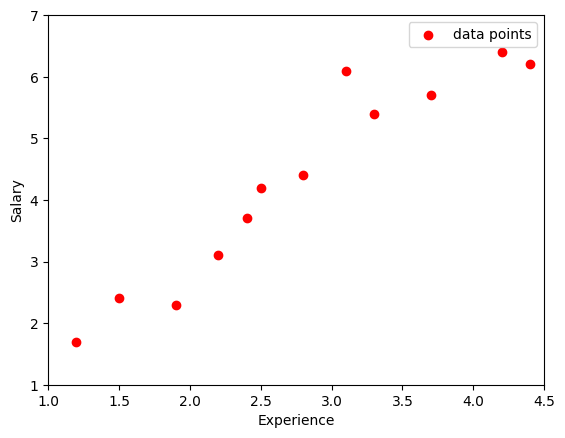

In [ ]:
# plotting the data

plt.scatter(data.experience, data.salary, color = 'red', label = 'data points')
plt.xlim(1,4.5)
plt.ylim(1,7)
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()

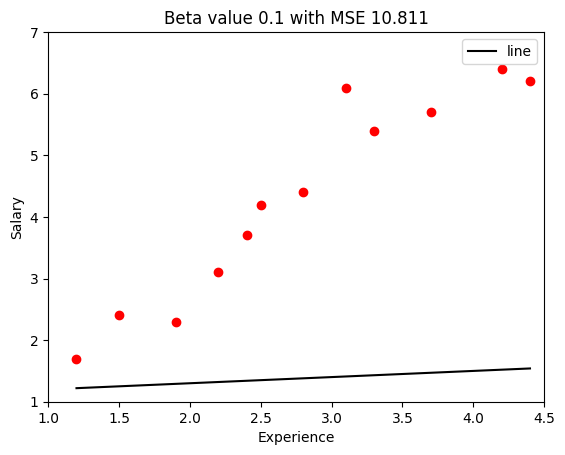

In [ ]:
def line_fn(beta) :
  # making lines for different Values of Beta 0.1, 0.8, 1.2
  beta = beta

  # keeping intercept constant
  b = 1.1

  # to store predicted points
  line1 = []

  # generating predictions for every data point
  for i in range(len(data)):
      line1.append(data.experience[i]*beta + b)

  # Plotting the line
  plt.scatter(data.experience, data.salary, color = 'red')
  plt.plot(data.experience, line1, color = 'black', label = 'line')
  plt.xlim(1,4.5)
  plt.ylim(1,7)
  plt.xlabel('Experience')
  plt.ylabel('Salary')
  plt.legend()

  MSE = mse(data.salary, line1)

  plt.title("Beta value "+str(beta)+" with MSE "+ str(round(MSE,3)))

  MSE = mse(data.salary, line1)
line_fn(0.1)

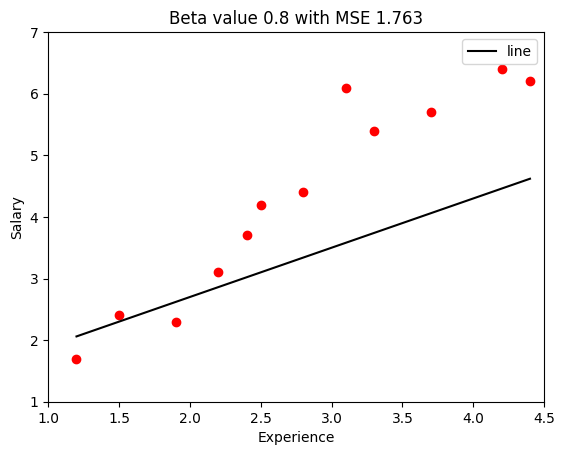

In [ ]:
#beta= 0.8
line_fn(0.8)

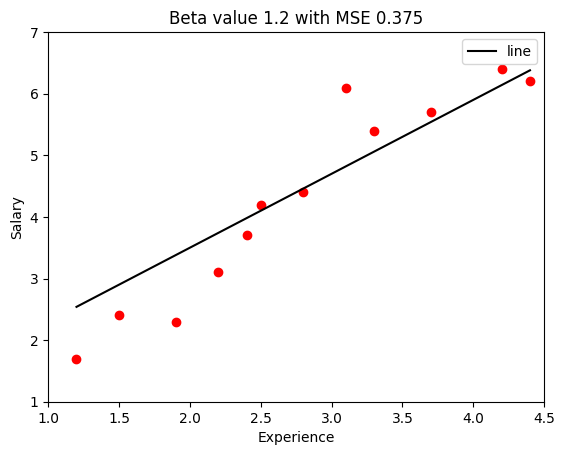

In [ ]:
# beta= 1.2
line_fn(1.2)

In [ ]:
# function to calculate error

def Error(Beta, data):

# b is constant
    b = 1.1

    salary = []
    experience = data.experience

# Loop to calculate predict salary variables
    for i in range(len(data.experience)):
        tmp = data.experience[i] * Beta + b
        salary.append(tmp)
    MSE = mse(data.salary, salary)
    return MSE

MSE = mse(data.salary, salary)

# Range of slopes from 0 to 1.5 with increment of 0.01

slope = [i/100 for i in range(0,150)]
Cost = []
for i in slope:
    cost = Error( Beta = i, data = data)
    Cost.append(cost)


In [ ]:
# Arranging in DataFrame

Cost_table = pd.DataFrame({
'Beta' : slope,
'Cost' : Cost
})

Cost_table.head()

,Beta,Cost
0,0.00,12.791667
1,0.01,12.585876
2,0.02,12.381806
3,0.03,12.179455
4,0.04,11.978824


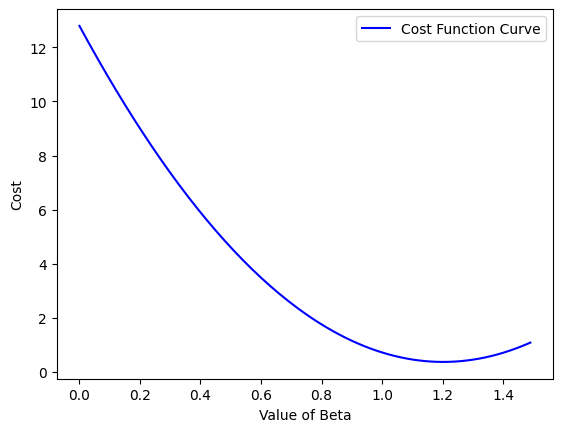

In [ ]:
# plotting the cost values corresponding to every value of Beta

plt.plot(Cost_table.Beta, Cost_table.Cost, color = 'blue', label = 'Cost Function Curve')
plt.xlabel('Value of Beta')
plt.ylabel('Cost')
plt.legend()

Here, we are varying ```beta``` and ```b``` has been kept constant. If we need to vary 2 parameters, we shall use the Gradient Descent Method to find the minima.


Gradient Descent is an algorithm that finds the best-fit line for a given training dataset in a smaller number of iterations.

If we plot m and c against MSE, it will acquire a bowl shape (As shown in the diagram below)



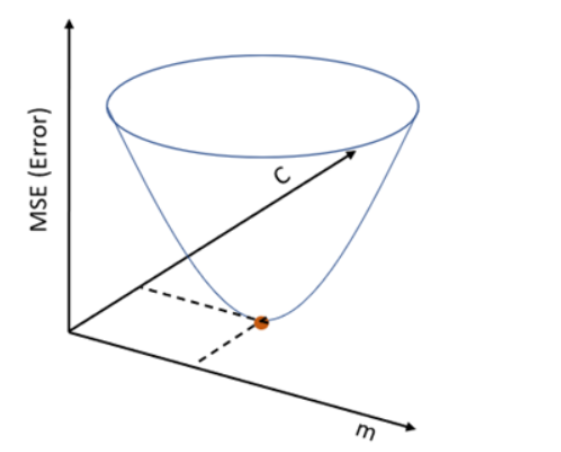


**What is a gradient?**

A gradient is just another word for the slope of a straight line. In short,

$$\text{gradient} = \frac{dy}{dx} = \text{slope of a straight line}$$

It is just another name for derivatives.


**What is gradient descent?**

The gradient descent algorithm is a technique used to find the point of the minimum value of a cost function to further compute the optimum values of betas. The term "gradient descent" literally means that you are going in the direction where the slope of a tangent of a cost function is descending or decreasing.

**How the gradient descent algorithm locates the point of minimum value of a function?**

The gradient descent algorithm,

- Calculates a gradient or slope of a tangent to the cost function curve at some initial arbitrary points on the curve.

- Refactors the gradients obtained by multiplying them with some arbitrary value called learning rate denoted by $\alpha$ and subtracts the refactored value from the initial points on the curve.

- Repeats the above steps until the lowest point on the curve is obtained

To implement the gradient descent algorithm, you need to go through the following steps:

1. Select some random values of betas, say $\beta_0 = 0, \beta_1 = 0$ and $\beta_2 = 0$

2. Compute the gradient or slope of a tangent on those points i.e. $\frac{\partial J}{\partial \beta_0}, \frac{\partial J}{\partial \beta_1}$ and $\frac{\partial J}{\partial \beta_2}$ at the points $\beta_0 = 0, \beta_1 = 0$ and $\beta_2 = 0$

3. Multiply the values obtained in the second step with $\alpha$ i.e. $\alpha \frac{\partial J}{\partial \beta_0}, \alpha \frac{\partial J}{\partial \beta_1}$ and $\alpha \frac{\partial J}{\partial \beta_2}$

4. Subtract the values obtained in the third step with the initial values of betas i.e. $\beta_0 - \alpha \frac{\partial J}{\partial \beta_0}, \beta_1 - \alpha \frac{\partial J}{\partial \beta_1}$ and $\beta_2 - \alpha \frac{\partial J}{\partial \beta_2}$

5. Replace the initial values of betas with the ones obtained in the fourth step i.e. $\beta_0 = \beta_0 - \alpha \frac{\partial J}{\partial \beta_0}, \beta_1 = \beta_1 - \alpha \frac{\partial J}{\partial \beta_1}$ and $\beta_2 = \beta_2 - \alpha \frac{\partial J}{\partial \beta_2}$

6. Repeat the above steps until the $\beta_0, \beta_1$ and $\beta_2$ values are obtained such that $J(\beta_0, \beta_1, \beta_2)$ is minimum.

In [ ]:
m, n = new_x_train_norm.shape[0], new_x_train_norm.shape[1]
print(m,n)
# Create the initial coefficients array.
initial_beta = np.zeros(shape = (1, n))
print(initial_beta)
print(new_x_train_norm)

212 4
[[0. 0. 0. 0.]]
[[ 1.          0.95055957 -0.92899096 -0.67469366]
 [ 1.         -0.0136444  -0.92899096 -0.67469366]
 [ 1.          0.95055957  0.53665431 -0.67469366]
 [ 1.         -0.97784836  0.170243   -0.67469366]
 [ 1.          0.95055957 -0.92899096  3.53221977]
 [ 1.         -0.97784836 -0.37937398 -0.67469366]
 [ 1.         -0.97784836 -0.83738813  2.48049141]
 [ 1.         -0.0136444  -0.92899096 -0.67469366]
 [ 1.          0.95055957  0.71985997 -0.67469366]
 [ 1.          0.95055957  0.53665431 -0.67469366]
 [ 1.          0.95055957 -0.92899096 -0.67469366]
 [ 1.         -0.97784836 -0.83738813 -0.67469366]
 [ 1.         -0.97784836  3.10153355  2.48049141]
 [ 1.         -0.97784836 -0.83738813  0.37703469]
 [ 1.         -0.0136444  -0.37937398 -0.67469366]
 [ 1.         -0.0136444   0.07864017 -0.67469366]
 [ 1.         -0.97784836 -0.92899096 -0.67469366]
 [ 1.         -0.97784836 -0.56257964 -0.67469366]
 [ 1.         -0.97784836  1.36107978 -0.67469366]
 [ 1.    

In [ ]:
def sigmoid(h):
  return 1/(1 + np.exp(-h))
def reg_cost_function(beta, X, y, reg_rate):
  m = X.shape[0] # Total number of records
  probs = sigmoid(np.matmul(beta, np.transpose(X))) #BX^T

  error = y.reshape(1, m) * np.log(probs) + (1 - y.reshape(1, m)) * np.log(1 - probs)
  cost = (-1 / m) * np.sum(error) + (reg_rate / (2 * m)) * np.sum(beta[:, 1:] ** 2)
  grad = np.zeros((1, X.shape[1]))
  for i in range(beta.shape[1]):
    grad[0][i] = (1 / m) * np.matmul(probs - y.reshape(1, m), X[:, i])
  return cost, grad

cost, grad = reg_cost_function(initial_beta, new_x_train_norm, y_train.values, 1)
print(cost,grad)

0.6931471805599453 [[-0.04245283 -0.21545702  0.21529845  0.21219902]]


/tmp/ipython-input-181596543.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[0][i] = (1 / m) * np.matmul(probs - y.reshape(1, m), X[:, i])


In [ ]:
def gradient_descent(X, y, beta, learn_rate, num_iters, reg_rate):
  m = X.shape[0]
  cost_func_values = []
  for i in range(num_iters):
    cost, grad = reg_cost_function(beta, X, y, reg_rate)
    beta[0][0] = beta[0][0] - learn_rate * grad[0][0]
    beta[0][1] = beta[0][1] - learn_rate * (grad[0][1] + reg_rate * beta[0][1] / m)
    beta[0][2] = beta[0][2] - learn_rate * (grad[0][2] + reg_rate * beta[0][2] / m)
    beta[0][3] = beta[0][3] - learn_rate * (grad[0][3] + reg_rate * beta[0][3] / m)

    cost_func_values.append(cost)

  return beta, cost_func_values

opt_beta, cost_func_values = gradient_descent(new_x_train_norm, y_train.values, initial_beta, 2, 50000, 1)
print("\nThe beta optimised by gradient descent:\n", opt_beta)
print("\nThe value of the cost function at the optimised beta:", cost_func_values[-1])


/tmp/ipython-input-181596543.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[0][i] = (1 / m) * np.matmul(probs - y.reshape(1, m), X[:, i])



The beta optimised by gradient descent:
 [[ 0.0914897   0.97528182 -1.03223412 -0.95975403]]

The value of the cost function at the optimised beta: 0.44362868591891325


##Cross - Validation:



In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
from sklearn.model_selection import KFold,cross_val_score

from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

k_fold = KFold(n_splits=5)
model = LogisticRegression()
scores = []

for train_index, test_index in k_fold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    scores.append(acc)

print("Accuracy scores:", scores)

Accuracy scores: [0.7868852459016393, 0.7704918032786885, 0.819672131147541, 0.7666666666666667, 0.6333333333333333]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c